In [1]:
import os, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim as gs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [20]:
#part 1 - data preparation 
text=[]
clas = []
classname = ["CEO", "Chairman", "Governance", "Highlights", "Remuniration"]
for item in classname:
    for file in os.listdir(r"/media/mi_air/Transcend/Folder Shared to Participants/S4-text-classification (2)/SummerSchoolSharedTask/Training/TrainingData/" +item ):
            filename = r"/media/mi_air/Transcend/Folder Shared to Participants/S4-text-classification (2)/SummerSchoolSharedTask/Training/TrainingData/" +item + "//"+file
            fl = open(filename, "r", encoding="utf8").read()
            fl = re.sub("\n", " ", fl)
            text.append(fl)
            clas.append(item)



In [21]:
data = pd.DataFrame(clas, columns=['class'])
data["text"] = text
data.head()

,class,text
0,CEO,6 AMEC plc annual report and accounts 2011 C...
1,CEO,AMEC plc annual report and accounts 2012 8 C...
2,CEO,08 AMEC plc annual report and accounts 2013 ...
3,CEO,AMERISUR RESOURCES PLC 5 CEO's Review...
4,CEO,AMERISUR RESOURCES PLC 5 Chief Execut...


In [22]:
from sklearn.utils import shuffle
data = shuffle(data)
data.to_csv(path_or_buf=r"/media/mi_air/Transcend/Folder Shared to Participants/S4-text-classification (2)/SummerSchoolSharedTask/Training/TrainingData/alltrain.csv", sep="\t")

In [23]:
#data = pd.read_csv(r"/home/mi_air/alltrain.csv", sep="\t")
data.head()

,class,text
8118,Remuniration,30 API Group plc DIRECTORS' REMUNERATION REPO...
7789,Highlights,Henry Boot PLC Annual Report and Financial St...
6758,Highlights,COBHAM PLC ANNUAL REPORT & ACCOUNTS 2003 5 Tu...
1066,CEO,Chief Executive's Review Operating Review I a...
1723,CEO,6 FULCRUM ANNUAL REPORT AND ACCOUNTS 2006 Th...


In [ ]:
#part 2 - training

In [4]:
from sklearn.feature_extraction.text import *
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression, LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, BaggingRegressor, RandomTreesEmbedding,GradientBoostingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

/home/mi_air/ioSavoy5/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
from sklearn.cross_validation import train_test_split
from random import choice

In [27]:
y = data["class"]
X = data["text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
rs = 42

clf =LogisticRegression(random_state=rs)   
clf2 = RandomForestClassifier(random_state=rs, n_jobs =-1)
clf3 = MultinomialNB()
clf4 = SVC(random_state =rs)
clf5 = BaggingClassifier(random_state=rs, n_jobs =-1)
"""clf6 =  SVC(class_weight="balanced", random_state =rs)
clf7 = DecisionTreeClassifier()
clf8 = ExtraTreeClassifier()
clf9 = LinearRegression() 
clf10 = LogisticRegressionCV()
clf11 = GradientBoostingClassifier(random_state =rs)"""
clflist = [clf, clf2, clf3, clf4, clf5]#, clf6, clf7, clf8, clf9, clf10, clf11]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Precision:   0.94
Recall:   0.94
F1-measure:   0.94
Accuracy:   0.94
              precision    recall  f1-score   support

         CEO       0.91      0.89      0.90       192
    Chairman       0.92      0.89      0.91       193
  Governance       0.93      0.98      0.96       196
  Highlights       0.93      0.94      0.94       196
Remuniration       0.99      0.98      0.98       223

 avg / total       0.94      0.94      0.94      1000



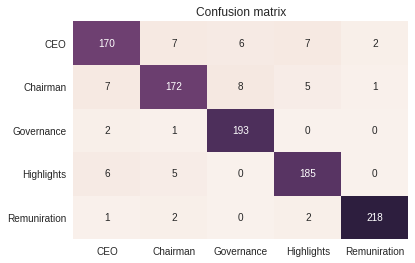

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
Precision:   0.92
Recall:   0.92
F1-measure:   0.92
Accuracy:   0.92
              precision    recall  f1-score   support

         CEO       0.86      0.89      0.87       192
    Chairman       0.89      0.88      0.89       193
  Governance       0.95      0.95      0.95       196
  Highlights       0.92      0.94      0.93       196
Remuniration       0.99      0.96      0.97       223

 avg / total       0.92      0.92      0.92      1000



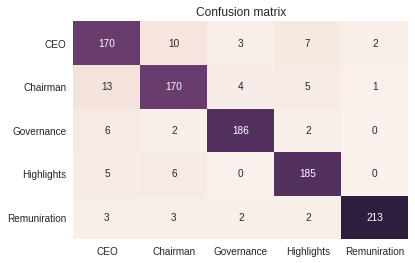

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Precision:   0.88
Recall:   0.88
F1-measure:   0.88
Accuracy:   0.88
              precision    recall  f1-score   support

         CEO       0.73      0.82      0.77       192
    Chairman       0.85      0.78      0.81       193
  Governance       0.92      0.99      0.95       196
  Highlights       0.94      0.84      0.88       196
Remuniration       0.98      0.98      0.98       223

 avg / total       0.89      0.88      0.88      1000



/home/mi_air/.local/lib/python3.5/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/home/mi_air/.local/lib/python3.5/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


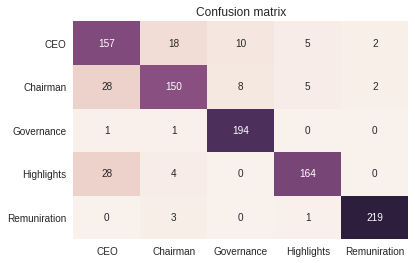

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
Precision:   0.88
Recall:   0.87
F1-measure:   0.87
Accuracy:   0.87
              precision    recall  f1-score   support

         CEO       0.69      0.86      0.77       192
    Chairman       0.84      0.65      0.73       193
  Governance       0.95      0.95      0.95       196
  Highlights       0.91      0.90      0.91       196
Remuniration       0.99      0.98      0.98       223

 avg / total       0.88      0.87      0.87      1000



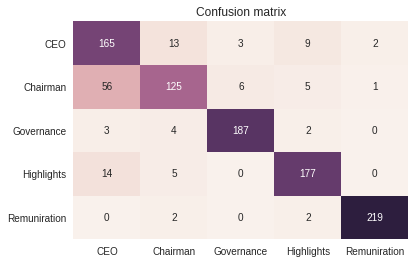

In [ ]:
for classif in clflist:
    clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', classif),
    ])


    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    labels = clf.classes_
    sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [26]:
data["text"].fillna("0")

8118     30 API Group plc DIRECTORS' REMUNERATION REPO...
7789     Henry Boot PLC Annual Report and Financial St...
6758     COBHAM PLC ANNUAL REPORT & ACCOUNTS 2003 5 Tu...
1066     Chief Executive's Review Operating Review I a...
1723     6 FULCRUM ANNUAL REPORT AND ACCOUNTS 2006  Th...
1046     5 Chief Executive's review Performance and Pr...
145      Chief Executive's  review The Group achieved ...
1870     WE ARE A RELATIVELY MATURE BUSINESS AND MAINT...
6859     31 Costain Group PLC Annual Report 2008 / www...
4392     Corporate Governance 20 Oxonica plc. Leaders ...
3859     2  www . tikit.com 16190 24/03/2009 Proof 10 ...
8549     15 betinternet.com plc annual report and acco...
9285     34 Cineworld Group plc  Annual Report and Acc...
1741     4 Future plc Annual Report and Accounts 2009 ...
1520     The Group was able   to maintain its low-cost...
2600     It has been another dynamic year for the ener...
3051     Chairman's statement   Donald Brydon  Chairma...
3751     2005 

In [28]:
rs = 42

clf5 = BaggingClassifier(random_state=rs, n_jobs =-1)
clf6 =  SVC(class_weight="balanced", random_state =rs)
clf7 = DecisionTreeClassifier()
#clf8 = ExtraTreeClassifier()
#clf9 = LinearRegression() 
#clf10 = LogisticRegressionCV()
#clf11 = GradientBoostingClassifier(random_state =rs)
clflist = [clf5, clf6, clf7]#, clf8, clf9, clf10, clf11]

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
         verbose=0, warm_start=False)
Precision:   0.93
Recall:   0.93
F1-measure:   0.93
Accuracy:   0.93
              precision    recall  f1-score   support

         CEO       0.86      0.96      0.91       186
    Chairman       0.91      0.92      0.92       218
  Governance       0.93      0.92      0.93       201
  Highlights       0.95      0.87      0.91       219
Remuniration       0.97      0.97      0.97       176

 avg / total       0.93      0.93      0.93      1000



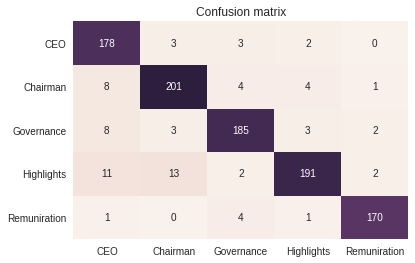

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
Precision:   0.87
Recall:   0.87
F1-measure:   0.87
Accuracy:   0.86
              precision    recall  f1-score   support

         CEO       0.68      0.89      0.77       186
    Chairman       0.85      0.70      0.77       218
  Governance       0.95      0.89      0.92       201
  Highlights       0.92      0.90      0.91       219
Remuniration       0.97      0.97      0.97       176

 avg / total       0.88      0.86      0.87      1000



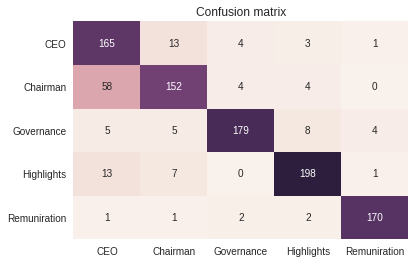

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Precision:   0.88
Recall:   0.88
F1-measure:   0.88
Accuracy:   0.88
              precision    recall  f1-score   support

         CEO       0.86      0.89      0.88       186
    Chairman       0.88      0.85      0.86       218
  Governance       0.86      0.90      0.88       201
  Highlights       0.88      0.86      0.87       219
Remuniration       0.93      0.92      0.92       176

 avg / total       0.88      0.88      0.88      1000



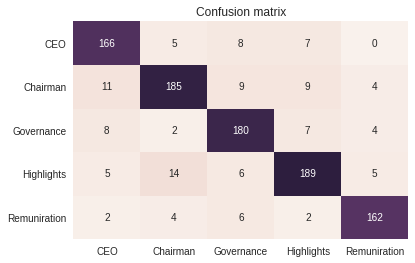

In [29]:
for classif in clflist:
    clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', classif),
    ])


    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    labels = clf.classes_
    sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [32]:
rs = 42

clf8 = ExtraTreeClassifier()
clf10 = LogisticRegressionCV()
clf11 = GradientBoostingClassifier(random_state =rs)
clflist = [ clf8, clf10, clf11]

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          random_state=None, splitter='random')
Precision:   0.80
Recall:   0.80
F1-measure:   0.80
Accuracy:   0.80
              precision    recall  f1-score   support

         CEO       0.66      0.74      0.70       186
    Chairman       0.73      0.68      0.70       218
  Governance       0.88      0.87      0.88       201
  Highlights       0.84      0.82      0.83       219
Remuniration       0.89      0.89      0.89       176

 avg / total       0.80      0.80      0.80      1000



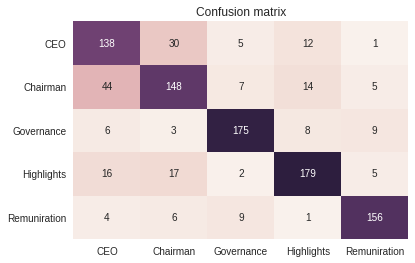

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)
Precision:   0.93
Recall:   0.93
F1-measure:   0.93
Accuracy:   0.93
              precision    recall  f1-score   support

         CEO       0.90      0.90      0.90       186
    Chairman       0.92      0.91      0.91       218
  Governance       0.93      0.92      0.92       201
  Highlights       0.93      0.96      0.94       219
Remuniration       0.98      0.97      0.97       176

 avg / total       0.93      0.93      0.93      1000



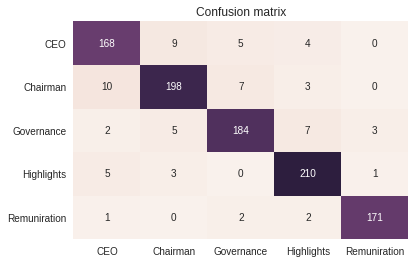

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.

In [39]:
for classif in clflist:
    clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf', classif),
    ])


    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    print(classif)
    print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
    print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
    print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
    print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))
    labels = clf.classes_
    sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix")
    plt.show()

In [ ]:
#now we've got the best classifiers
#let's perform GridSearch now to find best hyperparameters for these classifiers

In [47]:
file = open(r"/home/mi_air/eng_stopwords.txt", "r").readlines()
stopwords = []
for i in file: 
    stopwords.append(i.strip("\n"))
global stopwords

In [49]:
#deleting stopwords for LDA
def del_stopwords(text):
    mystopwords=stopwords
    
    try:
        ls = [token for token in text.split() if not token in mystopwords]
        ls = " ".join(ls)
        return (ls)
    except:
        return ""

In [51]:
nostop = []
for i in range(len(data)):
    nostop.append(del_stopwords(data.text.iloc[i]))
data["text_nostopwords"] = nostop

In [52]:
data.head()

,class,text,text_nostopwords
8118,Remuniration,30 API Group plc DIRECTORS' REMUNERATION REPO...,30 API Group plc DIRECTORS' REMUNERATION REPOR...
7789,Highlights,Henry Boot PLC Annual Report and Financial St...,Henry Boot PLC Annual Report Financial Stateme...
6758,Highlights,COBHAM PLC ANNUAL REPORT & ACCOUNTS 2003 5 Tu...,COBHAM PLC ANNUAL REPORT ACCOUNTS 2003 5 Turno...
1066,CEO,Chief Executive's Review Operating Review I a...,Chief Executive's Review Operating Review I de...
1723,CEO,6 FULCRUM ANNUAL REPORT AND ACCOUNTS 2006 Th...,6 FULCRUM ANNUAL REPORT AND ACCOUNTS 2006 The ...


In [53]:
data.to_csv(path_or_buf="/home/mi_air/alltrain_nostopwords.csv", sep="\t")

In [57]:
labellst = []
for i in range(len(data)):
    if data["class"].iloc[i]=="CEO":
        labellst.append(0)
    elif data["class"].iloc[i]=="Highlights":
        labellst.append(1)
    elif data["class"].iloc[i]=="Remuniration":
        labellst.append(2)
    elif data["class"].iloc[i]=="Governance":
        labellst.append(3)
    else:
        labellst.append(4)
data["num_labels"] = labellst

In [59]:
X = data.text_nostopwords
y = data["num_labels"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
rs = 4

#bow representations for the three sets unlabelled, train and test
vectorizer = CountVectorizer(max_features=200)

corpus_tfidf_unsuper = vectorizer.fit_transform(X)
corpus_tfidf_train = vectorizer.transform(x_train)
corpus_tfidf_test= vectorizer.transform(x_test)

#transform to gensim acceptable objects
vocab = vectorizer.get_feature_names()
id2word_unsuper=dict([(i, s) for i, s in enumerate(vocab)])
corpus_vect_gensim_unsuper = gs.matutils.Sparse2Corpus(corpus_tfidf_unsuper.T)
corpus_vect_gensim_train = gs.matutils.Sparse2Corpus(corpus_tfidf_train.T)
corpus_vect_gensim_test = gs.matutils.Sparse2Corpus(corpus_tfidf_test.T)

#fit the model to the unlabelled data
lda = gs.models.LdaModel(corpus_vect_gensim_unsuper, 
                  id2word = id2word_unsuper, 
                  num_topics = 5, 
                  passes=10, random_state=42)
print("gone 10 passes")


gone 10 passes


In [61]:
#transform the train and test set to the latent topic space
docTopicProbMat_train = lda[corpus_vect_gensim_train]
docTopicProbMat_test = lda[corpus_vect_gensim_test]
#transform to csr matrices
train_lda=gs.matutils.corpus2csc(docTopicProbMat_train)
test_lda=gs.matutils.corpus2csc(docTopicProbMat_test)
#fit the classifier and print the accuracy
clf =LogisticRegression(random_state=rs)   
clf2 = RandomForestClassifier(random_state=rs, n_jobs =-1)
clf3 = MultinomialNB()
clf4 = SVC(random_state =rs)
clf5 = BaggingClassifier(random_state=rs, n_jobs =-1)
clf6 =  SVC(class_weight="balanced", random_state =rs)
clf7 = DecisionTreeClassifier()
clf8 = ExtraTreeClassifier()
#clf9 = GradientBoostingClassifier(random_state =rs)
clf10 = LogisticRegressionCV()
clflist = [clf, clf2, clf3, clf4, clf5, clf6,clf7, clf8, clf10]
for classif in clflist:
    classif.fit(train_lda.transpose(), np.array(y_train).astype(int))     
    predictions = classif.predict(test_lda.transpose())
    print (accuracy_score(y_test.astype(int), predictions))

0.698
0.74
0.725
0.739
0.742
0.74
0.719
0.708
0.707


In [83]:
from __future__ import print_function


import keras
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence, text
from keras.optimizers import RMSprop, Adam
import pandas as pd
import re



In [84]:
X = data.text
y = data["num_labels"]
print(X.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

(10000,)
(10000,)


In [85]:

tk = Tokenizer(num_words=1000, lower=True)
tk.fit_on_texts(X)

x = tk.texts_to_sequences(X)
x2 = X

print (len(tk.word_counts))

max_len = 80
print ("max_len ", max_len)
print('Pad sequences (samples x time)')

x = sequence.pad_sequences(x, maxlen=max_len)



#max_features = 300
model = Sequential()

92718
max_len  80
Pad sequences (samples x time)


In [74]:
'''Trains and evaluate a simple MLP
on the Reuters newswire topic classification task.
'''
#idx = len(x_train)
#x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
#x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])

max_words = num_words = 1000
batch_size = 16
epochs = 10

print('Loading data...')
#(x_train, y_train), (x_test, y_test) = load_data(num_words=max_words)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')




Loading data...
9000 train sequences
1000 test sequences


In [86]:
num_classes = 5
print(num_classes, 'classes')

print('Vectorizing sequence data...')

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
x2 = tokenizer.texts_to_sequences(x2)

5 classes
Vectorizing sequence data...


In [87]:
x_train = tokenizer.sequences_to_matrix(x_train, mode='tfidf')
x_test = tokenizer.sequences_to_matrix(x_test, mode='tfidf')
x2 = tokenizer.sequences_to_matrix(x2, mode='tfidf')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


x_train shape: (9000, 1000)
x_test shape: (1000, 1000)


In [88]:
print('Convert class vector to binary class matrix '
      '(for use with categorical_crossentropy)')
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y = keras.utils.to_categorical(y, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix (for use with categorical_crossentropy)
y_train shape: (9000, 5)
y_test shape: (1000, 5)


In [91]:


print('Building model...')
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('tanh'))
model.add(Activation('elu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
#model.add(Dense(16))
#model.add(Activation('linear'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

optimizer = RMSprop(lr=0.01,decay=0.0002)
optimizer2 = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0002)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer2,
              metrics=['accuracy'])

history = model.fit(x2, y=y,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Building model...
Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 3s - loss: 0.6526 - acc: 0.7323 - val_loss: 0.4545 - val_acc: 0.8410

In [113]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(testdata["text"])
x3 = tokenizer.texts_to_sequences(testdata["text"])

In [114]:
x3 = tokenizer.sequences_to_matrix(x3, mode='tfidf')

In [121]:

predictions4 = model.predict_classes(x3,  batch_size=16, verbose=1)

400/500 [=======================>......] - ETA: 0s

In [123]:
predictions5 = []
for i in predictions4:
    if i==0:
        predictions5.append("CEO")
    elif i==1:
        predictions5.append("Highlights")
    elif i==2:
        predictions5.append("Remuniration")
    elif i==3:
        predictions5.append("Governance")
    else:
        predictions5.append("Chairman")


In [127]:
len(predictions5)

500

In [128]:
outfile3 = open(r"/home/mi_air/testing_perceptron.txt", "w", encoding="utf8")
for i in range(len(testdata)):
    stroka = testdata["filename"].iloc[i] + "\t" + predictions5[i]
    outfile3.write(stroka + "\n")

In [136]:
files=[]
texts=[]

for file in os.listdir(r"/media/mi_air/Transcend/Folder Shared to Participants/S4-text-classification (2)/SummerSchoolSharedTask/Testing/TestingData"):
    filename = r"/media/mi_air/Transcend/Folder Shared to Participants/S4-text-classification (2)/SummerSchoolSharedTask/Testing/TestingData/" + file
    test = open(filename, "r", encoding="utf8").read()
    test = re.sub("\n", " ", test)
    files.append(file)
    texts.append(test)
testdata = pd.DataFrame(files, columns=['filename'])
testdata["text"] = texts
testdata.head()

,filename,text
0,101.txt,26 Afren plc Annual Report and Accounts 2011 ...
1,102.txt,Chief Executive Officer's Review When I join...
2,103.txt,14 Aero Inventory plc 2008 Our Business Our ...
3,104.txt,888 Holdings Public Limited Company  C H I E...
4,105.txt,888 Holdings plc www.888holdingsplc.com 8 162...


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Precision:   0.93
Recall:   0.93
F1-measure:   0.93
Accuracy:   0.93
              precision    recall  f1-score   support

         CEO       0.91      0.89      0.90       186
    Chairman       0.90      0.91      0.91       218
  Governance       0.92      0.91      0.91       201
  Highlights       0.92      0.95      0.94       219
Remuniration       0.97      0.97      0.97       176

 avg / total       0.93      0.93      0.93      1000



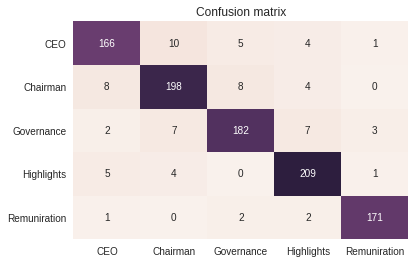

In [137]:

y = data["class"]
X = data["text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf',  LogisticRegression(random_state=rs)),
    ])
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classif)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))
labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [138]:
predictions2 = clf.predict(testdata["text"])
testdata["class"] = predictions2
testdata.head()

,filename,text,class
0,101.txt,26 Afren plc Annual Report and Accounts 2011 ...,CEO
1,102.txt,Chief Executive Officer's Review When I join...,CEO
2,103.txt,14 Aero Inventory plc 2008 Our Business Our ...,CEO
3,104.txt,888 Holdings Public Limited Company  C H I E...,CEO
4,105.txt,888 Holdings plc www.888holdingsplc.com 8 162...,CEO


In [143]:
testdata["class"].value_counts()

Remuniration    104
CEO             102
Chairman        102
Highlights      101
Governance       91
Name: class, dtype: int64

In [140]:
outfile = open(r"/home/mi_air/testing_logitregression.txt", "w", encoding="utf8")

In [142]:
len(testdata)

500

In [141]:
for i in range(len(testdata)):
    stroka = testdata["filename"].iloc[i] + "\t" + testdata["class"].iloc[i]
    outfile.write(stroka + "\n")

In [105]:
from sklearn.grid_search import GridSearchCV
#prepare for training
##try large number of possible features but then put in regularisation to stop overfitting
count_vect = CountVectorizer(min_df = 1, ngram_range = (1, 4),max_features=5000)
X_train_counts = count_vect.fit_transform(data["text"])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
y_train=data["class"]

rs = 42
classif =LogisticRegression(random_state=rs,penalty='l2')  

#grid search for ammount of regularisation
grid_search = GridSearchCV(classif, {'C':[10,5,2,1,0.1,0.01,0.001,0.0001]}, cv=10, n_jobs=20, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)
print(grid_search)
#summarise best 
print(grid_search.best_score_)
print(grid_search.best_estimator_)

/home/mi_air/ioSavoy5/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=20,
       param_grid={'C': [10, 5, 2, 1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)
0.9422
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Precision:   0.93
Recall:   0.93
F1-measure:   0.93
Accuracy:   0.93
              precision    recall  f1-score   support

         CEO       0.91      0.91      0.91       186
    Chairman       0.92      0.91      0.92       218
  Governance       0.93      0.92      0.93       201
  Highlights       0.93      0.95      0.94       219
Remuniration       0.97      0.97      0.97       176

 avg / total       0.93      0.93      0.93      1000



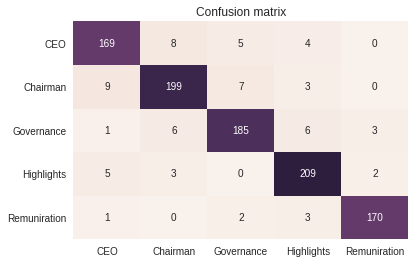

In [108]:

y = data["class"]
X = data["text"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf2 = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3), analyzer='word', max_features=200)),
    ('tfidf', TfidfTransformer(sublinear_tf=True)),
    #('reducer', TruncatedSVD(n_components=Val3)),
    ('clf',  LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)),
    ])
clf2.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(classif)
print("Precision: {0:6.2f}".format(precision_score(y_test, predictions, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test, predictions, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test, predictions, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test, predictions)))
print(classification_report(y_test, predictions))
labels = clf.classes_
sns.heatmap(data=confusion_matrix(y_test, predictions), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [132]:
outfile2 = open(r"/home/mi_air/testing_logitregression_grids.txt", "w", encoding="utf8")

In [134]:
len(testdata)

500

In [133]:
predictions3 = clf2.predict(testdata["text"])
for i in range(len(testdata)):
    stroka = testdata["filename"].iloc[i] + "\t" + predictions3[i]
    outfile3.write(stroka + "\n")